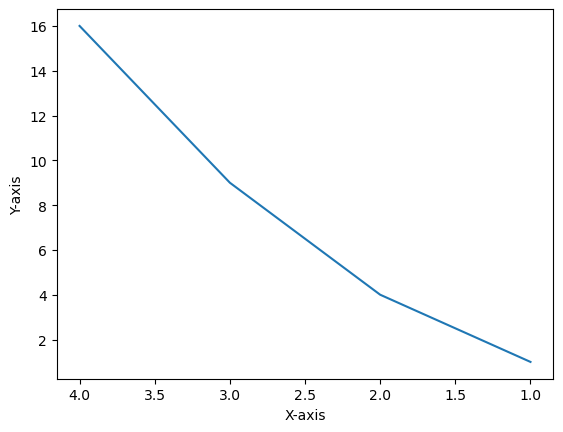

In [1]:
import matplotlib.pyplot as plt

# Create a sample plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Flip the x-axis
plt.xlim(plt.xlim()[::-1])

# Show the plot
plt.show()


In [3]:
import matplotlib.pyplot as plt
import random
color_list = list(plt.colors.cnames)

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

In [20]:
import numpy as np

def linear_interpolate_below_threshold(column, threshold):
    """
    Linearly interpolate values in a column below a given threshold.

    Parameters:
    - column: A numpy array representing a single column where interpolation is needed.
    - threshold: The threshold below which values need to be interpolated.

    Returns:
    A numpy array with the interpolated column.
    """
    # Convert column to a numpy array to ensure numpy operations can be performed
    column = np.array(column)
    # Identify indices where values are above the threshold
    above_threshold_indices = np.where(column > threshold)[0]
    print(above_threshold_indices)
    if len(above_threshold_indices) < 2:
        # If there are less than two points above the threshold,
        # interpolation cannot be performed, return original column
        return column

    # Loop from the second 'above threshold' index to the last
    for start, end in zip(above_threshold_indices[:-1], above_threshold_indices[1:]):
        # Linearly interpolate between start and end indices
        print(start,end)
        column[start:end + 1] = np.linspace(column[start], column[end], end - start + 1)

    return column

def interpolate_array_below_threshold(A, threshold):
    """
    Apply linear interpolation to columns of array A for values below a threshold.

    Parameters:
    - A: A numpy 2D array where each column needs to be checked for interpolation.
    - threshold: The threshold below which values need to be interpolated.

    Returns:
    A numpy 2D array with interpolated columns.
    """
    A = np.array(A)  # Ensure A is a numpy array
    for i in range(A.shape[1]):  # Iterate over columns
        A[:, i] = linear_interpolate_below_threshold(A[:, i], threshold)
    return A

# Example usage
# A = np.array([[1, 0, 0, 0, 2, 7, 0, 0, 1]],dtype=np.float32).T  # Example column, transposed to column vector
A = np.array([[1,0,0,0,2,7,0,0,1,5,0,3]],dtype=np.float32).T
threshold = 0.5
interpolated_A = interpolate_array_below_threshold(A, threshold)
print(interpolated_A.flatten())  # Use flatten to print as a single row for comparison


[ 0  4  5  8  9 11]
0 4
4 5
5 8
8 9
9 11
[1.   1.25 1.5  1.75 2.   7.   5.   3.   1.   5.   4.   3.  ]


In [28]:
import numpy as np

# Your initial vector and threshold
a = np.array([1,0,0,0,2,7,0,0,1,5,0,3], dtype=np.float32)
tau = 0.5

# Find indices below the threshold
below_tau_idx = np.where(a < tau)[0]

# Find the differences between consecutive indices
diffs = np.diff(below_tau_idx)

# Find where the difference is greater than 1 (i.e., breaks in consecutive sequences)
breaks = np.where(diffs > 1)[0]

# Use these breaks to split the indices into groups of consecutive indices
groups = np.split(below_tau_idx, breaks + 1)  # Add 1 because np.split expects positions in the array

# Convert the resulting arrays into lists for easier reading/manipulation, if desired
groups = [list(group) for group in groups]

print(below_tau_idx)
print(diffs)
print(breaks)
print(groups)

b = a
for group in groups:
    lval = a[group[0]-1]
    rval = a[group[-1]+1]
    # if group[0] == 0:
    #     lval = rval
    # if group[-1] == a.size-1:
    #     rval = lval
    
    b[group] = (rval-lval)/((group[-1]+1) - (group[0]-1)) * (group - (group[0]-1)) + lval
print(b)

[ 1  2  3  6  7 10]
[1 1 3 1 3]
[2 4]
[[1, 2, 3], [6, 7], [10]]
[1.   1.25 1.5  1.75 2.   7.   5.   3.   1.   5.   4.   3.  ]


In [43]:
def lin_interp_sino2D(data,tau):
    def lin_interp_proj(proj):
        above_tau_indices = np.where(proj > tau)[0]
        diffs = np.diff(above_tau_indices)
        breaks = np.where(diffs > 1)[0]
        groups = np.split(above_tau_indices, breaks+1)
        groups = [list(group) for group in groups]

        print(above_tau_indices)
        print(diffs)
        print(breaks)
        print(groups)
        for group in groups:
            if group[0] == 0:
                lval = tau
            else:
                lval = proj[group[0]-1]
            if group[-1] == proj.size-1:
                rval = tau
            else:
                rval = proj[group[-1]+1]
            
            proj[group] = (rval-lval)/((group[-1]+1) - (group[0]-1)) * (group - (group[0]-1)) + lval
        return proj
    
    data_interp = np.apply_along_axis(func1d=lin_interp_proj, axis=0, arr=data)
    return data_interp

# A = np.array([[1,0,0,0,2,7,0,0,1,5,0,3],[0,0,3,4,5,0,0,2,0,8,0,1]], dtype=np.float32).T
# A = np.array([[1,0,0,0,2,7,0,0,1,5,0,3]], dtype=np.float32).T
A = np.array([[0,1,2,3,3.2,1.5,0,3,1,5,0,0],[0,1,2,3,3.2,1.5,0,3,1,5,0,0]], dtype=np.float32).T
print(A)
lin_interp_sino2D(A,1.7)

[[0.  0. ]
 [1.  1. ]
 [2.  2. ]
 [3.  3. ]
 [3.2 3.2]
 [1.5 1.5]
 [0.  0. ]
 [3.  3. ]
 [1.  1. ]
 [5.  5. ]
 [0.  0. ]
 [0.  0. ]]
[2 3 4 7 9]
[1 1 3 2]
[2 3]
[[2, 3, 4], [7], [9]]
[2 3 4 7 9]
[1 1 3 2]
[2 3]
[[2, 3, 4], [7], [9]]


array([[0.   , 0.   ],
       [1.   , 1.   ],
       [1.125, 1.125],
       [1.25 , 1.25 ],
       [1.375, 1.375],
       [1.5  , 1.5  ],
       [0.   , 0.   ],
       [0.5  , 0.5  ],
       [1.   , 1.   ],
       [0.5  , 0.5  ],
       [0.   , 0.   ],
       [0.   , 0.   ]], dtype=float32)

In [6]:
import numpy as np

def interpolate_below_threshold(column, threshold):
    # Ensure the column is a NumPy array
    column = np.asarray(column)
    # Placeholder array for the output
    output = column.copy()
    # Find indices where the value is above the threshold
    above_threshold_indices = np.where(column > threshold)[0]
    print(above_threshold_indices)
    
    # Add start and end indices to handle edge cases
    extended_indices = np.concatenate(([-1], above_threshold_indices, [len(column)]))
    print(extended_indices)
    
    for i in range(len(extended_indices) - 1):
        start_index = extended_indices[i] + 1
        end_index = extended_indices[i + 1]
        
        # Check if the segment should be interpolated (i.e., more than 2 elements and below threshold)
        if end_index - start_index > 1:
            # Linearly interpolate
            start_value = column[start_index - 1] if start_index > 0 else 0
            end_value = column[end_index] if end_index < len(column) else column[-1]
            
            slope = (end_value - start_value) / (end_index - start_index + 1)
            
            for j in range(start_index, end_index):
                output[j] = start_value + slope * (j - start_index + 1)
    
    return output

# Example usage
column = np.array([1, 0, 0, 0, 2, 7, 0, 0, 1])
threshold = 0.5
interpolated_column = interpolate_below_threshold(column, threshold)
print(interpolated_column)


[0 4 5 8]
[-1  0  4  5  8  9]
[1 1 1 1 2 7 5 3 1]


In [1]:
import numpy as np

def linear_interpolate_below_threshold(arr, tau):
    nrows, ncols = arr.shape
    for col in range(ncols):
        start = None  # Start index for interpolation
        for row in range(nrows):
            if arr[row, col] > tau:
                if start is not None:
                    # Perform interpolation between start and row
                    end_val = arr[row, col]
                    start_val = arr[start, col]
                    step = (end_val - start_val) / (row - start)
                    for i in range(start + 1, row):
                        arr[i, col] = start_val + step * (i - start)
                    start = None  # Reset start index
                else:
                    # Not in interpolation range, move along
                    continue
            else:
                if start is None:  # Check if we've started a sequence below tau
                    start = row - 1 if row > 0 else 0  # Mark the start of a sequence needing interpolation

        # Handle trailing values below threshold, assuming linear continuation
        if start is not None and start < nrows - 1:
            arr[start + 1:, col] = np.linspace(arr[start, col], arr[start, col] + (arr[start, col] - arr[start - 1, col]), nrows - start - 1)

    return arr

# Example usage
A = np.array([[1, 0, 0, 0, 2, 7, 0, 0, 1]]).T  # .T to make it a column in the example
tau = 0.5
interpolated_A = linear_interpolate_below_threshold(A, tau)
print(interpolated_A)


[[1]
 [1]
 [1]
 [1]
 [2]
 [7]
 [5]
 [3]
 [1]]


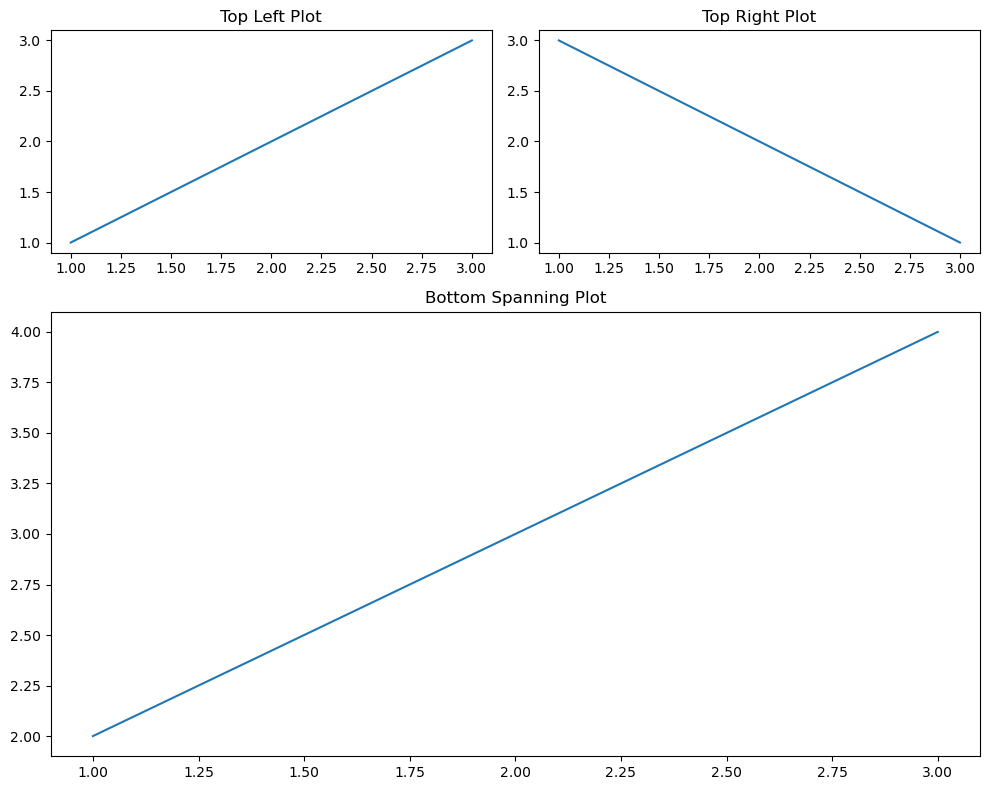

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Create figure
fig = plt.figure(figsize=(10, 8))

# Create a GridSpec with 2 rows and 2 columns,
# and set the width ratio for the columns and the height ratios for the rows
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])

# First subplot in the first row spanning the first column
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Top Left Plot')

# Second subplot in the first row spanning the second column
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Top Right Plot')

# Third subplot in the second row spanning both columns
ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Bottom Spanning Plot')

# Plot something in each axis
ax1.plot([1, 2, 3], [1, 2, 3])
ax2.plot([1, 2, 3], [3, 2, 1])
ax3.plot([1, 2, 3], [2, 3, 4])

# Adjust the layout
plt.tight_layout()
plt.show()


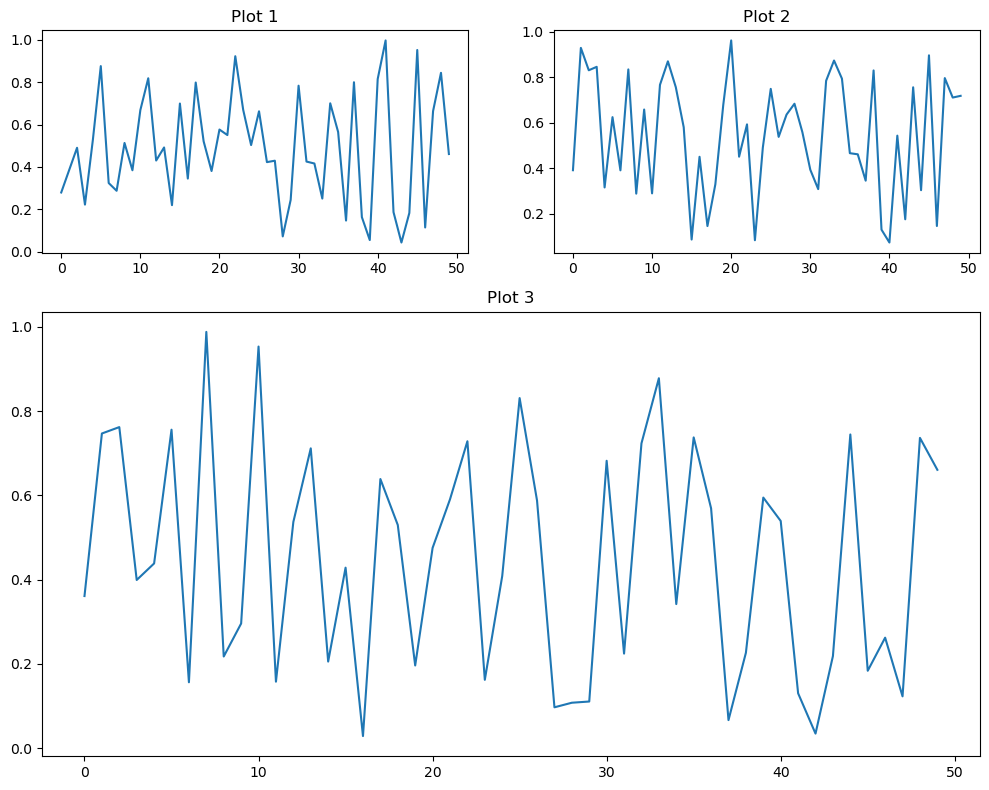

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec,GridSpecFromSubplotSpec

# Create a 2x1 subplot
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 1, height_ratios=[1, 2])

# Create a nested 1x2 grid in the first part of the 2x1 grid
top_row_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])

# Now we can index ax as a list
ax = [None] * 3
ax[0] = fig.add_subplot(top_row_gs[0, 0])
ax[1] = fig.add_subplot(top_row_gs[0, 1])
ax[2] = fig.add_subplot(gs[1])

# Let's populate our subplots with some random data
for i in range(3):
    ax[i].plot(np.random.rand(50))
    ax[i].set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
plt.show()

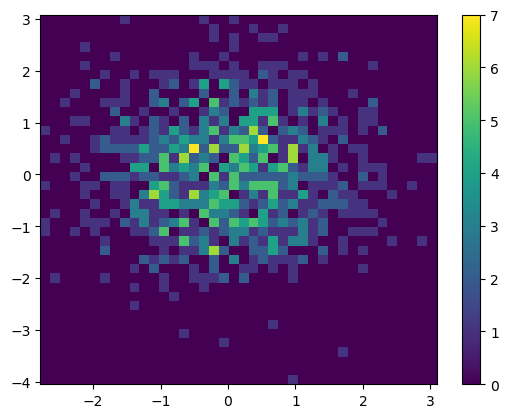

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.hist2d(x, y, bins=40)
plt.colorbar()  # Adds a colorbar to show the histogram scale.
plt.show()